# Simple CNN in CIFAR-10 Dataset



In [1]:
!pip install torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 729.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 29.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

In [8]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


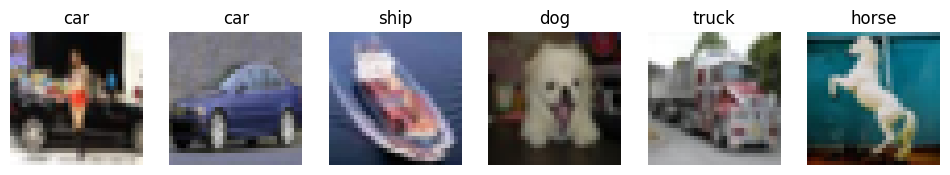

In [9]:

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


def show_images(dataset, num_images=6):

    fig, axes = plt.subplots(1, num_images, figsize=(12, 2))
    for i in range(num_images):

        idx = np.random.randint(0, len(dataset))
        image, label = dataset[idx]


        image = image / 2 + 0.5
        image = image.numpy()
        image = np.transpose(image, (1, 2, 0))


        axes[i].imshow(image)
        axes[i].set_title(classes[label])
        axes[i].axis('off')
    plt.show()


show_images(train_dataset)

In [4]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 10)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleCNN()

In [5]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [6]:
num_epochs = 5

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.3f}')
            running_loss = 0.0

print('Training finished!')

Epoch 1, Batch 100, Loss: 2.294
Epoch 1, Batch 200, Loss: 2.268
Epoch 1, Batch 300, Loss: 2.210
Epoch 1, Batch 400, Loss: 2.121
Epoch 1, Batch 500, Loss: 2.043
Epoch 1, Batch 600, Loss: 1.961
Epoch 1, Batch 700, Loss: 1.903
Epoch 2, Batch 100, Loss: 1.818
Epoch 2, Batch 200, Loss: 1.790
Epoch 2, Batch 300, Loss: 1.762
Epoch 2, Batch 400, Loss: 1.701
Epoch 2, Batch 500, Loss: 1.676
Epoch 2, Batch 600, Loss: 1.628
Epoch 2, Batch 700, Loss: 1.606
Epoch 3, Batch 100, Loss: 1.539
Epoch 3, Batch 200, Loss: 1.517
Epoch 3, Batch 300, Loss: 1.502
Epoch 3, Batch 400, Loss: 1.477
Epoch 3, Batch 500, Loss: 1.449
Epoch 3, Batch 600, Loss: 1.450
Epoch 3, Batch 700, Loss: 1.438
Epoch 4, Batch 100, Loss: 1.386
Epoch 4, Batch 200, Loss: 1.401
Epoch 4, Batch 300, Loss: 1.383
Epoch 4, Batch 400, Loss: 1.354
Epoch 4, Batch 500, Loss: 1.380
Epoch 4, Batch 600, Loss: 1.342
Epoch 4, Batch 700, Loss: 1.335
Epoch 5, Batch 100, Loss: 1.323
Epoch 5, Batch 200, Loss: 1.293
Epoch 5, Batch 300, Loss: 1.312
Epoch 5,

In [7]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test data: {100 * correct / total:.2f}%')

Accuracy on test data: 53.68%


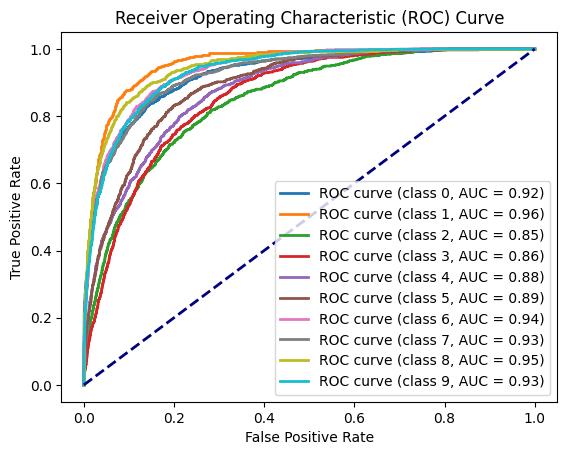

In [14]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F



true_labels = []
pred_probs = []

model.eval()

with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        outputs = model(inputs)
        probabilities = F.softmax(outputs, dim=1)
        pred_probs.extend(probabilities.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

true_labels = np.array(true_labels)
pred_probs = np.array(pred_probs)


fpr = dict()
tpr = dict()
roc_auc = dict()

num_classes = 10

for i in range(num_classes):

    binary_labels = (true_labels == i).astype(int)


    class_probs = pred_probs[:, i]


    fpr[i], tpr[i], _ = roc_curve(binary_labels, class_probs)
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure()
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (class {i}, AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

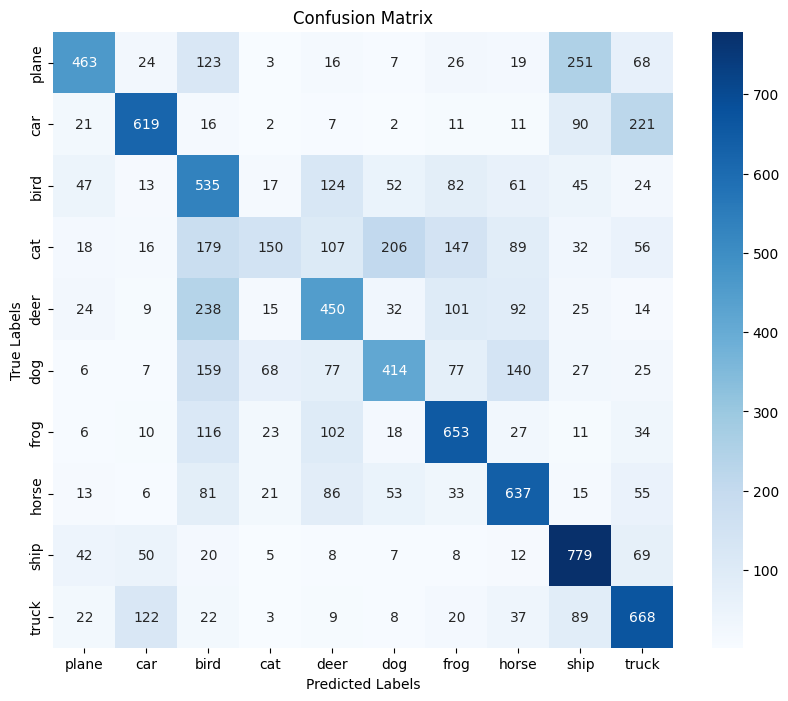

In [15]:

from sklearn.metrics import confusion_matrix
import seaborn as sns

predicted_labels = np.argmax(pred_probs, axis=1)

cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
